#EDA



Question 1: Read the Bike Details dataset into a Pandas DataFrame and display   its first 10 rows.

(Show the shape and column names as well.)

(Include your Python code and output in the code box below.)

Answer:  

In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/BIKE DETAILS.csv')

# Display the first 10 rows
print("First 10 rows:")
display(df.head(10))

# Display the shape of the DataFrame
print("\nShape of the DataFrame:")
print(df.shape)

# Display the column names
print("\nColumn names:")
print(df.columns)

First 10 rows:


,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN
5,Honda CB Twister,18000,2010,Individual,1st owner,60000,53857.0
6,Honda CB Hornet 160R,78500,2018,Individual,1st owner,17000,87719.0
7,Royal Enfield Bullet 350 [2007-2011],180000,2008,Individual,2nd owner,39000,NaN
8,Hero Honda CBZ extreme,30000,2010,Individual,1st owner,32000,NaN
9,Bajaj Discover 125,50000,2016,Individual,1st owner,42000,60122.0



Shape of the DataFrame:
(1061, 7)

Column names:
Index(['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven',
       'ex_showroom_price'],
      dtype='object')


Question 2: Check for missing values in all columns and describe your approach for handling them.

(Include your Python code and output in the code box below.)


In [2]:
# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())


Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

(Include your Python code and output in the code box below.)

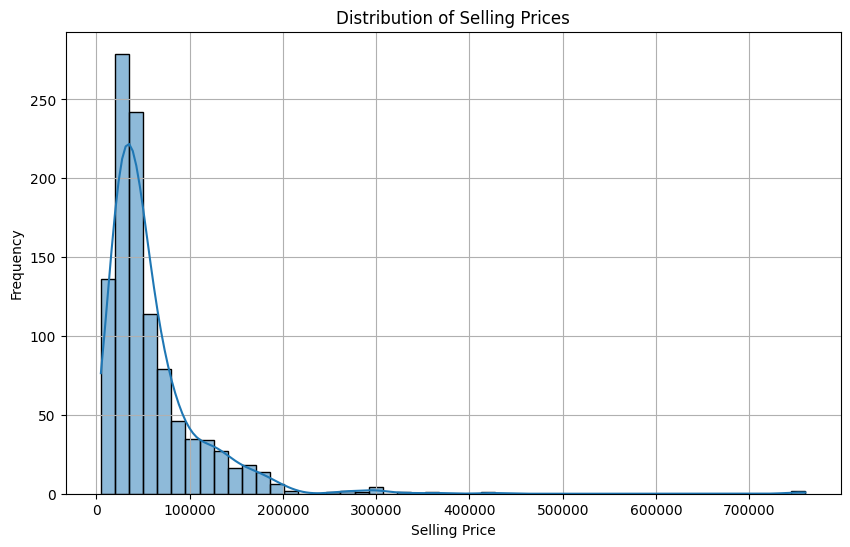

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of selling prices
plt.figure(figsize=(10, 6))
sns.histplot(df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Selling Prices')
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.

(Include your Python code and output in the code box below.)

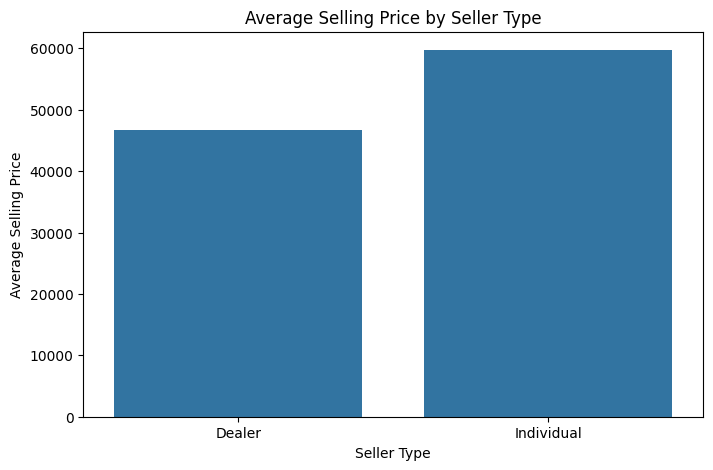

In [4]:
# Calculate the average selling price for each seller_type
average_price_by_seller_type = df.groupby('seller_type')['selling_price'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='seller_type', y='selling_price', data=average_price_by_seller_type)
plt.title('Average Selling Price by Seller Type')
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.show()

Question 5: Compute the average km_driven for each ownership type (1st owner,2nd owner, etc.), and present the result as a bar plot.

(Include your Python code and output in the code box below.)

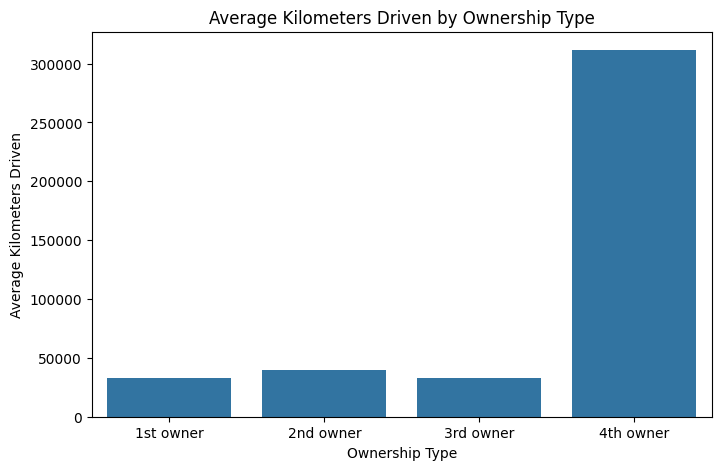

In [5]:
 #Compute the average km_driven for each ownership type
average_km_by_owner_type = df.groupby('owner')['km_driven'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='owner', y='km_driven', data=average_km_by_owner_type)
plt.title('Average Kilometers Driven by Ownership Type')
plt.xlabel('Ownership Type')
plt.ylabel('Average Kilometers Driven')
plt.show()

Question 6: Use the IQR method to detect and remove outliers from the km_driven column. Show before-and-after summary statistics.

(Include your Python code and output in the code box below.)

In [6]:
 #Before outlier removal
print("Summary statistics of km_driven BEFORE outlier removal:")
display(df['km_driven'].describe())

# Calculate the IQR for km_driven
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out the outliers
df_filtered = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)].copy()

# After outlier removal
print("\nSummary statistics of km_driven AFTER outlier removal:")
display(df_filtered['km_driven'].describe())

Summary statistics of km_driven BEFORE outlier removal:


,km_driven
count,1061.000000
mean,34359.833176
std,51623.152702
min,350.000000
25%,13500.000000
50%,25000.000000
75%,43000.000000
max,880000.000000



Summary statistics of km_driven AFTER outlier removal:


,km_driven
count,1022.000000
mean,28203.415851
std,19552.083583
min,350.000000
25%,13000.000000
50%,24000.000000
75%,40000.000000
max,86000.000000


Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.

(Include your Python code and output in the code box below.)

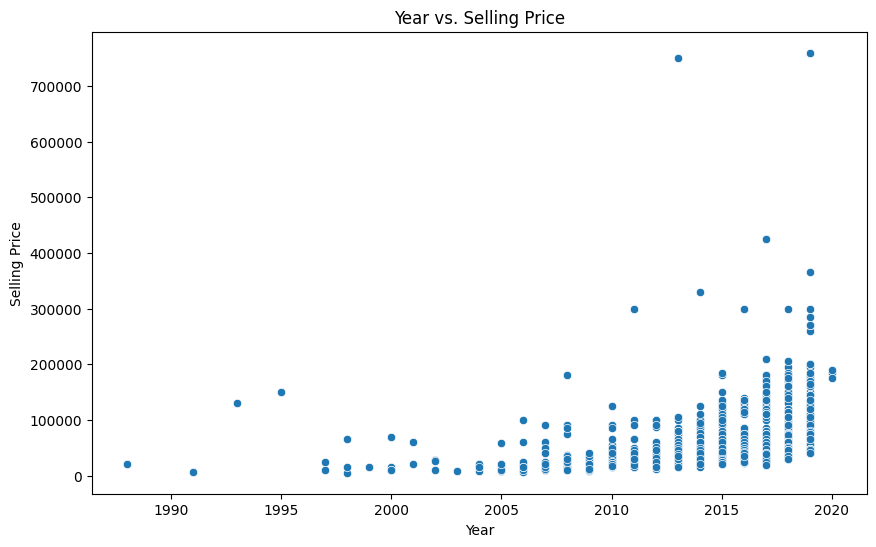

In [7]:
# Create a scatter plot of year vs. selling_price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='year', y='selling_price', data=df)
plt.title('Year vs. Selling Price')
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot encoding. Display the first 5 rows of the resulting DataFrame.

(Include your Python code and output in the code box below.)

In [8]:
# Convert 'seller_type' column into numeric format using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display the first 5 rows of the resulting DataFrame
print("DataFrame after one-hot encoding of 'seller_type':")
display(df_encoded.head())

DataFrame after one-hot encoding of 'seller_type':


,name,selling_price,year,owner,km_driven,ex_showroom_price,seller_type_Dealer,seller_type_Individual
0,Royal Enfield Classic 350,175000,2019,1st owner,350,NaN,False,True
1,Honda Dio,45000,2017,1st owner,5650,NaN,False,True
2,Royal Enfield Classic Gunmetal Grey,150000,2018,1st owner,12000,148114.0,False,True
3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,1st owner,23000,89643.0,False,True
4,Yamaha SZ [2013-2014],20000,2011,2nd owner,21000,NaN,False,True


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.

What correlations stand out the most?

(Include your Python code and output in the code box below.)

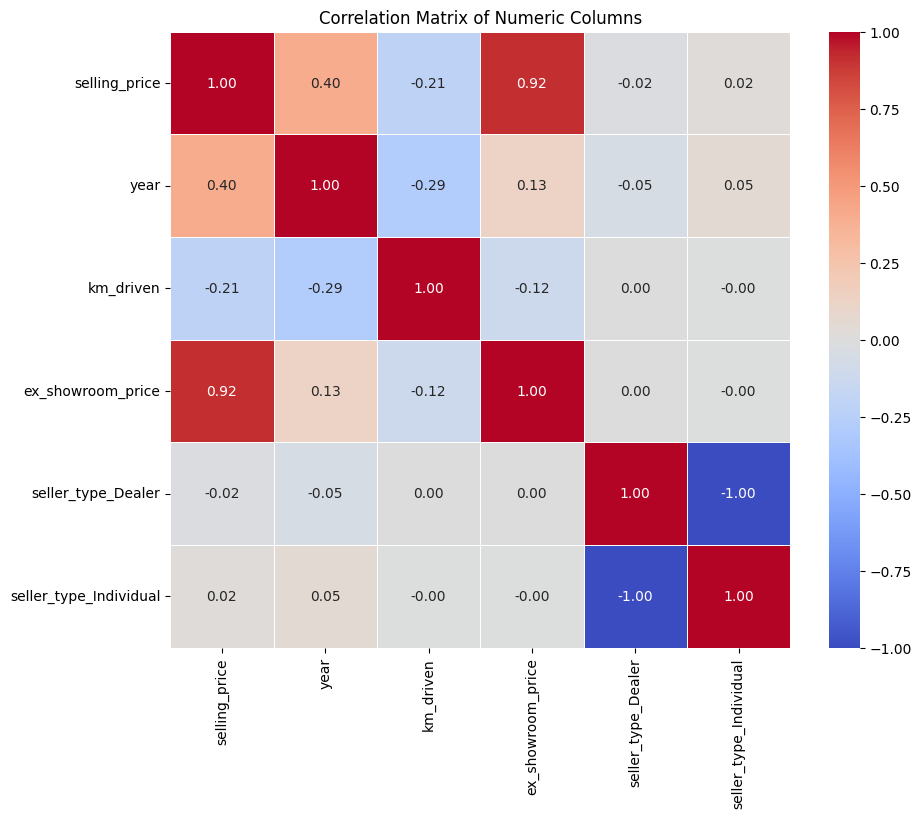

In [12]:
# Calculate the correlation matrix
correlation_matrix = df_encoded.corr(numeric_only=True)

# Generate a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numeric Columns')
plt.show()

Question 10: Summarize your findings in a brief report:

● What are the most important factors affecting a bike's selling price?

● Mention any data cleaning or feature engineering you performed.

**Summary Report**

Based on the exploratory data analysis performed on the Bike Details dataset, here is a summary of the findings:

**Most Important Factors Affecting a Bike's Selling Price:**

*   **Year:** The analysis showed a strong positive correlation between the year of the bike and its selling price. This indicates that newer bikes tend to command higher selling prices.
*   **Ex-Showroom Price:** There is a very strong positive correlation between the original ex-showroom price and the selling price. This is a significant factor in determining the resale value of a bike.
*   **Kilometers Driven:** There is a negative correlation between the kilometers driven and the selling price, suggesting that bikes with higher mileage generally have lower selling prices. However, this correlation appears to be weaker than the correlation with year and ex-showroom price.
*   **Seller Type:** The bar plot of average selling price by seller type indicated that bikes sold by dealers tend to have a higher average selling price compared to those sold by individuals.

**Data Cleaning and Feature Engineering Performed:**

*   **Missing Value Check:** We identified that the `ex_showroom_price` column had a significant number of missing values.
*   **Outlier Detection and Removal:** The IQR method was used to detect and remove outliers from the `km_driven` column, which helped to address extreme values that could skew analysis.
*   **One-Hot Encoding:** The categorical `seller_type` column was converted into a numeric format using one-hot encoding, creating new binary columns (`seller_type_Dealer` and `seller_type_Individual`) that can be used in quantitative analysis or modeling.

These steps of data cleaning and feature engineering were performed to prepare the dataset for further analysis and potential predictive modeling.